In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('Jins_Varghese_Lookalike.csv')

data['transaction_date'] = pd.to_datetime(data['transaction_date'])
latest_date = data['transaction_date'].max()

data['days_since_last_transaction'] = (latest_date - data['transaction_date']).dt.days

data['churn'] = data['days_since_last_transaction'].apply(lambda x: 1 if x > 30 else 0)

In [10]:
churn_data = data.groupby('cust_id').agg(
    total_transactions=('transaction_id', 'count'),
    avg_spending=('total_value', 'mean'),
    max_spending=('total_value', 'max'),
    days_since_last_transaction=('days_since_last_transaction', 'min'),
    churn=('churn', 'max')
).reset_index()

In [11]:
features = ['total_transactions', 'avg_spending', 'max_spending', 'days_since_last_transaction']
X = churn_data[features]
y = churn_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

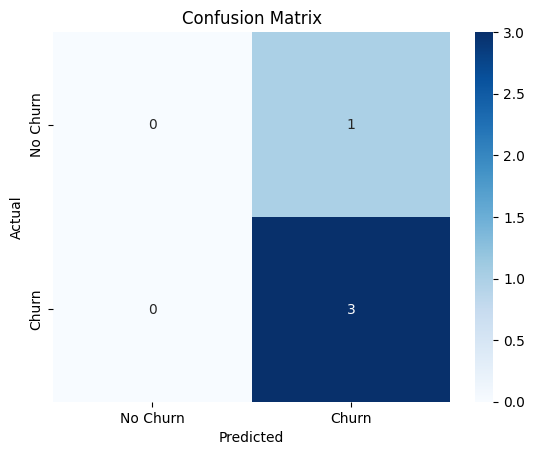

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

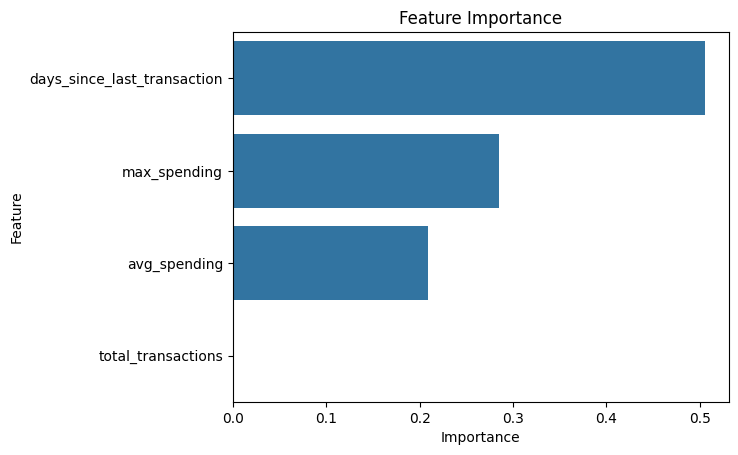

In [14]:
importance = pd.DataFrame({'Feature': features, 'Importance': clf.feature_importances_}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance')
plt.show()

In [15]:
churn_data['predicted_churn'] = clf.predict(X)
churn_data.to_csv('Jins_Varghese_ChurnPredictions.csv', index=False)
print("Churn predictions saved to Jins_Varghese_ChurnPredictions.csv")

Churn predictions saved to Jins_Varghese_ChurnPredictions.csv
